# 6.2 ESA Task 6.2 Exploring relationships - South Korea

## Table of Contents

### 01. Import libraries and datasets

### 02. Verify dataset import results

### 03. Combine dataframe subsets for EDA

### 04. EDA (Exploratory Data Analysis)

>#### 04.01 Correlation matrix heatmaps

>>##### South Korea

>#### 04.02 Scatterplots

>>##### South Korea

>#### 04.03 Pair Plots

>>##### Japan, South Korea

>#### 04.04 Categorical Plots

>>##### South Korea

>>>##### Scatterplots & stacked bar histograms with categorical exogenous shock variable overlay

### 01. Import libraries and datasets

In [3]:
import pandas as pd
import numpy as np
import os

# Import visualization libraries

import seaborn as sns
import matplotlib.pyplot as plt

In [394]:
# Create string path to main project folder, to use with a Python shortcut for importing files

path = r'C:\Users\dirk8\CareerFoundry Projects\05-2025 Exogenous Shocks Analysis'

# Import first dataset

fx_vix_comm = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'fx_vix_comm_pre_stat.pkl'))

# Import seven (7) country-level subset datasets

ctry_us = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'us_pre_stat.pkl'))
ctry_germany = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'germany_pre_stat.pkl'))
ctry_japan = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'japan_pre_stat.pkl'))
ctry_south_korea = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'south_korea_pre_stat.pkl'))
ctry_australia = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'australia_pre_stat.pkl'))
ctry_norway = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'norway_pre_stat.pkl'))
ctry_switzerland = pd.read_pickle(os.path.join(path, 'Data', 'Prepared Data', 'switzerland_pre_stat.pkl'))

### 02. Verify dataset import results

In [14]:
# Check the dimensions
fx_vix_comm.shape

(243, 74)

In [16]:
# Check the last 3 rows
fx_vix_comm.tail(3)

,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,...,wti_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,lng_asia_avg_logret12,metals_idx_avg_logret12,iron_ore_avg_logret12,copper_avg_logret12,aluminum_avg_logret12,gold_oz_usd_logret12,food_idx_avg_logret12
240,2025-01-01,2025,1,2025-01,Jan,False,False,False,True,True,...,0.021216,-0.011698,0.437476,0.343717,-0.046635,-0.274710,0.072208,0.155268,0.286810,0.000664
241,2025-02-01,2025,2,2025-02,Feb,False,False,False,True,True,...,-0.076930,-0.084259,0.637948,0.512185,0.009276,-0.151745,0.116488,0.197657,0.358192,-0.017491
242,2025-03-01,2025,3,2025-03,Mar,False,False,False,True,True,...,-0.174869,-0.169132,0.433658,0.378025,0.043760,-0.061186,0.113314,0.173413,0.323844,-0.050646


In [38]:
ctry_south_korea.shape

(243, 31)

In [40]:
ctry_south_korea.tail(3)

,country,timestamp,year,month,year_month,month_text,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,...,fx_to_usd_logret12,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg
4128,South Korea,2025-01-01,2025,1,2025-01,Jan,False,False,False,True,...,0.090444,-0.0042,-0.0070,-0.0053,-0.007678,0.022216,-0.042029,0.00995,0.000000,-0.000978
4129,South Korea,2025-02-01,2025,2,2025-02,Feb,False,False,False,True,...,0.082512,-0.0062,-0.0074,-0.0060,-0.019463,0.020058,-0.042029,0.00995,0.000000,-0.000978
4130,South Korea,2025-03-01,2025,3,2025-03,Mar,False,False,False,True,...,0.090493,-0.0072,-0.0081,-0.0059,-0.042971,0.020354,-0.042029,0.00995,-0.036368,-0.000978


### 03. Combine dataframe subsets for EDA

#### South Korea

In [228]:
# Check for candidate target columns from ctry_south_korea
ctry_south_korea.columns

Index(['country', 'timestamp', 'year', 'month', 'year_month', 'month_text',
       'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag',
       'boj_int_rate_flag', 'fx_to_usd', 'int_rate_ovn', 'int_rate_3m',
       'int_rate_10y', 'stock_index', 'cons_prices', 'gdp_pc_usd',
       'real_gdp_chg_pct', 'unemp_rate', 'population', 'fx_to_usd_logret12',
       'int_rate_ovn_diff', 'int_rate_3m_diff', 'int_rate_10y_diff',
       'stock_index_logret12', 'cons_prices_logret12', 'gdp_pc_usd_logret12',
       'real_gdp_chg_pct_logret12', 'unemp_rate_logret12',
       'population_pct_chg'],
      dtype='object')

In [230]:
# Select specific columns from each dataframe, to form 2 subset dataframes which will be combined (merged, in this case)
# Select the first-step transformed variables rather than original variables for more meaningful EDA
df1 = ctry_south_korea[['country', 'timestamp', 'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag', 'boj_int_rate_flag',\
               'int_rate_ovn_diff', 'int_rate_3m_diff', 'int_rate_10y_diff', 'stock_index_logret12', 'cons_prices_logret12',\
               'gdp_pc_usd_logret12', 'real_gdp_chg_pct_logret12', 'unemp_rate_logret12', 'population_pct_chg', 'fx_to_usd_logret12']]
df2 = fx_vix_comm[['timestamp', 'vix_avg_logret12']]

In [232]:
df1.shape

(243, 17)

In [234]:
df2.shape

(243, 2)

In [236]:
# Merge df1 and df2 subset dataframes using a left join, which ensures that all rows from df1 are retained
# Note: from prior work creating the parent dataframes, we know that the 'timestamp' values should match precisely, in chronological order
ctry_south_korea_merge = pd.merge(df1, df2, on='timestamp', how='left')

In [238]:
ctry_south_korea_merge.shape

(243, 18)

In [240]:
ctry_south_korea_merge.tail(3)

,country,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg,fx_to_usd_logret12,vix_avg_logret12
240,South Korea,2025-01-01,False,False,False,True,True,-0.0042,-0.0070,-0.0053,-0.007678,0.022216,-0.042029,0.00995,0.000000,-0.000978,0.090444,0.224487
241,South Korea,2025-02-01,False,False,False,True,True,-0.0062,-0.0074,-0.0060,-0.019463,0.020058,-0.042029,0.00995,0.000000,-0.000978,0.082512,0.193819
242,South Korea,2025-03-01,False,False,False,True,True,-0.0072,-0.0081,-0.0059,-0.042971,0.020354,-0.042029,0.00995,-0.036368,-0.000978,0.090493,0.459799


In [242]:
ctry_south_korea_merge.head(15)

,country,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg,fx_to_usd_logret12,vix_avg_logret12
0,South Korea,2005-01-01,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,0.043059,NaN,NaN,NaN,NaN
1,South Korea,2005-02-01,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,0.043059,NaN,NaN,NaN,NaN
2,South Korea,2005-03-01,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,0.043059,NaN,NaN,NaN,NaN
3,South Korea,2005-04-01,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,0.043059,NaN,NaN,NaN,NaN
4,South Korea,2005-05-01,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,0.043059,NaN,NaN,NaN,NaN
5,South Korea,2005-06-01,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,0.043059,NaN,NaN,NaN,NaN
6,South Korea,2005-07-01,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,0.043059,NaN,NaN,NaN,NaN
7,South Korea,2005-08-01,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,0.043059,NaN,NaN,NaN,NaN
8,South Korea,2005-09-01,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,0.043059,NaN,NaN,NaN,NaN
9,South Korea,2005-10-01,False,False,False,False,False,NaN,NaN,NaN,NaN,NaN,NaN,0.043059,NaN,NaN,NaN,NaN


In [244]:
# As for the United States (above), delete first 12 rows and overwrite the subset merged dataframe
ctry_south_korea_merge.drop(index=range(12), inplace=True)

In [246]:
ctry_south_korea_merge.shape

(231, 18)

In [248]:
ctry_south_korea_merge.head(3)

,country,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg,fx_to_usd_logret12,vix_avg_logret12
12,South Korea,2006-01-01,False,False,False,False,False,0.0048,0.0068,0.0116,0.423264,0.022055,0.113968,0.050693,-0.111226,0.005266,-0.056028,-0.110001
13,South Korea,2006-02-01,False,False,False,False,False,0.0066,0.0066,0.0040,0.332493,0.019828,0.113968,0.050693,-0.028171,0.005266,-0.051202,0.062883
14,South Korea,2006-03-01,False,False,False,False,False,0.0072,0.0072,0.0065,0.298500,0.019710,0.113968,0.050693,-0.028171,0.005266,-0.033303,-0.116166


In [250]:
# As for the United States (above), reset the index (the argument "drop=True" drops the original index)
ctry_south_korea_merge.reset_index(drop=True, inplace=True)

In [252]:
ctry_south_korea_merge.head(3)

,country,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg,fx_to_usd_logret12,vix_avg_logret12
0,South Korea,2006-01-01,False,False,False,False,False,0.0048,0.0068,0.0116,0.423264,0.022055,0.113968,0.050693,-0.111226,0.005266,-0.056028,-0.110001
1,South Korea,2006-02-01,False,False,False,False,False,0.0066,0.0066,0.0040,0.332493,0.019828,0.113968,0.050693,-0.028171,0.005266,-0.051202,0.062883
2,South Korea,2006-03-01,False,False,False,False,False,0.0072,0.0072,0.0065,0.298500,0.019710,0.113968,0.050693,-0.028171,0.005266,-0.033303,-0.116166


In [254]:
ctry_south_korea_merge.tail(3)

,country,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg,fx_to_usd_logret12,vix_avg_logret12
228,South Korea,2025-01-01,False,False,False,True,True,-0.0042,-0.0070,-0.0053,-0.007678,0.022216,-0.042029,0.00995,0.000000,-0.000978,0.090444,0.224487
229,South Korea,2025-02-01,False,False,False,True,True,-0.0062,-0.0074,-0.0060,-0.019463,0.020058,-0.042029,0.00995,0.000000,-0.000978,0.082512,0.193819
230,South Korea,2025-03-01,False,False,False,True,True,-0.0072,-0.0081,-0.0059,-0.042971,0.020354,-0.042029,0.00995,-0.036368,-0.000978,0.090493,0.459799


In [256]:
# Export the country = South Korea subset merged dataframe as backup, before conducting EDA
ctry_south_korea_merge.to_pickle(os.path.join(path, 'Data','Prepared Data', 'ctry_south_korea_merge.pkl'))

#### FX, VIX, commodity indices, commodities

In [388]:
fx_vix_comm.columns

Index(['timestamp', 'year', 'month', 'year_month', 'month_text', 'gfc_flag',
       'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag', 'boj_int_rate_flag',
       'aud_cad', 'aud_jpy', 'chf_aud', 'chf_cad', 'chf_jpy', 'eur_aud',
       'eur_cad', 'eur_chf', 'eur_gbp', 'eur_jpy', 'eur_usd', 'gbp_aud',
       'gbp_cad', 'gbp_jpy', 'gbp_usd', 'usd_aud', 'usd_cad', 'usd_chf',
       'usd_jpy', 'vix_avg', 'all_comm_idx_avg', 'energy_idx_avg', 'wti_avg',
       'brent_avg', 'nat_gas_eu_avg', 'lng_asia_avg', 'metals_idx_avg',
       'iron_ore_avg', 'copper_avg', 'aluminum_avg', 'gold_oz_usd',
       'food_idx_avg', 'aud_cad_logret12', 'aud_jpy_logret12',
       'chf_aud_logret12', 'chf_cad_logret12', 'chf_jpy_logret12',
       'eur_aud_logret12', 'eur_cad_logret12', 'eur_chf_logret12',
       'eur_gbp_logret12', 'eur_jpy_logret12', 'eur_usd_logret12',
       'gbp_aud_logret12', 'gbp_cad_logret12', 'gbp_jpy_logret12',
       'gbp_usd_logret12', 'usd_aud_logret12', 'usd_cad_logret12',
       'usd_c

In [412]:
# No merging needed for this dataframe, instead a subset dataframe is created for EDA
# As for the oecd_ctry subset merged dataframes created above, the first-step transformed variables are selected
fx_vix_comm_sub = fx_vix_comm[['timestamp', 'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag', 'boj_int_rate_flag',\
                              'aud_cad_logret12', 'aud_jpy_logret12', 'chf_aud_logret12', 'chf_cad_logret12', 'chf_jpy_logret12',\
                              'eur_aud_logret12', 'eur_cad_logret12', 'eur_chf_logret12', 'eur_gbp_logret12', 'eur_jpy_logret12',\
                              'eur_usd_logret12', 'gbp_aud_logret12', 'gbp_cad_logret12', 'gbp_jpy_logret12','gbp_usd_logret12',\
                              'usd_aud_logret12', 'usd_cad_logret12', 'usd_chf_logret12', 'usd_jpy_logret12', 'vix_avg_logret12',\
                              'all_comm_idx_avg_logret12', 'energy_idx_avg_logret12', 'wti_avg_logret12', 'brent_avg_logret12',\
                              'nat_gas_eu_avg_logret12', 'lng_asia_avg_logret12', 'metals_idx_avg_logret12', 'iron_ore_avg_logret12',\
                              'copper_avg_logret12', 'aluminum_avg_logret12', 'gold_oz_usd_logret12', 'food_idx_avg_logret12']]

In [414]:
# Check the dimensions
fx_vix_comm_sub.shape

(243, 38)

In [416]:
# Check the last 3 rows
fx_vix_comm_sub.tail(3)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,aud_cad_logret12,aud_jpy_logret12,chf_aud_logret12,chf_cad_logret12,...,wti_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,lng_asia_avg_logret12,metals_idx_avg_logret12,iron_ore_avg_logret12,copper_avg_logret12,aluminum_avg_logret12,gold_oz_usd_logret12,food_idx_avg_logret12
240,2025-01-01,False,False,False,True,True,0.011173,0.004112,0.011364,0.012739,...,0.021216,-0.011698,0.437476,0.343717,-0.046635,-0.274710,0.072208,0.155268,0.286810,0.000664
241,2025-02-01,False,False,False,True,True,0.022473,-0.020073,0.005698,0.025642,...,-0.076930,-0.084259,0.637948,0.512185,0.009276,-0.151745,0.116488,0.197657,0.358192,-0.017491
242,2025-03-01,False,False,False,True,True,0.011173,-0.045619,0.045462,0.069870,...,-0.174869,-0.169132,0.433658,0.378025,0.043760,-0.061186,0.113314,0.173413,0.323844,-0.050646


In [418]:
# Check the middle columns of the last 3 rows
fx_vix_comm_sub.iloc[240:243, 9:29]

,chf_cad_logret12,chf_jpy_logret12,eur_aud_logret12,eur_cad_logret12,eur_chf_logret12,eur_gbp_logret12,eur_jpy_logret12,eur_usd_logret12,gbp_aud_logret12,gbp_cad_logret12,gbp_jpy_logret12,gbp_usd_logret12,usd_aud_logret12,usd_cad_logret12,usd_chf_logret12,usd_jpy_logret12,vix_avg_logret12,all_comm_idx_avg_logret12,energy_idx_avg_logret12,wti_avg_logret12
240,0.012739,0.010516,0.012121,0.020340,0.000000,-0.023530,0.017037,-0.046957,0.035994,0.040120,0.040320,-0.032003,0.064125,0.071973,0.056512,0.068870,0.224487,0.081167,0.082635,0.021216
241,0.025642,-0.015594,0.000000,0.020340,-0.010582,-0.023811,-0.021275,-0.037740,0.025447,0.051587,0.006908,-0.007968,0.038466,0.057570,0.022473,0.013870,0.193819,0.080687,0.055248,-0.076930
242,0.069870,0.000415,0.035507,0.052993,-0.010363,-0.023530,-0.010866,-0.009217,0.055152,0.072861,0.010141,0.015625,0.038466,0.064539,-0.011300,-0.004817,0.459799,0.025966,-0.040285,-0.174869


In [420]:
# Check the first 15 rows for expected NaNs due to the first-step transformations to an annual cycle conducted in the prior Task 6.1
fx_vix_comm_sub.head(15)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,aud_cad_logret12,aud_jpy_logret12,chf_aud_logret12,chf_cad_logret12,...,wti_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,lng_asia_avg_logret12,metals_idx_avg_logret12,iron_ore_avg_logret12,copper_avg_logret12,aluminum_avg_logret12,gold_oz_usd_logret12,food_idx_avg_logret12
0,2005-01-01,False,False,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
1,2005-02-01,False,False,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
2,2005-03-01,False,False,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
3,2005-04-01,False,False,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
4,2005-05-01,False,False,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
5,2005-06-01,False,False,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
6,2005-07-01,False,False,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
7,2005-08-01,False,False,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
8,2005-09-01,False,False,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN
9,2005-10-01,False,False,False,False,False,NaN,NaN,NaN,NaN,...,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN,NaN


In [422]:
# As for the OECD country EDA-targeted created dataframes (above), delete first 12 rows and overwrite the subset dataframe
# Need to modify a copy of the subset dataframe to avoid the warning message "A value is trying to be set on a copy of a slice from a Dataframe"
fx_vix_comm_sub_copy = fx_vix_comm_sub.copy()
fx_vix_comm_sub_copy.drop(index=range(12), inplace=True)

In [424]:
# Check the dimensions
fx_vix_comm_sub_copy.shape

(231, 38)

In [426]:
# Check the first 3 rows
fx_vix_comm_sub_copy.head(3)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,aud_cad_logret12,aud_jpy_logret12,chf_aud_logret12,chf_cad_logret12,...,wti_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,lng_asia_avg_logret12,metals_idx_avg_logret12,iron_ore_avg_logret12,copper_avg_logret12,aluminum_avg_logret12,gold_oz_usd_logret12,food_idx_avg_logret12
12,2006-01-01,False,False,False,False,False,-0.066691,0.100485,-0.074108,-0.133531,...,0.335465,0.359997,0.414646,0.232039,0.248924,0.173926,0.403719,0.260799,0.259859,-0.008664
13,2006-02-01,False,False,False,False,False,-0.132060,0.064805,-0.038100,-0.167054,...,0.250573,0.285218,0.414646,0.257307,0.248784,0.173926,0.426659,0.264717,0.270769,-0.020714
14,2006-03-01,False,False,False,False,False,-0.133531,0.032516,-0.028171,-0.155755,...,0.146838,0.164536,0.414646,0.202498,0.225671,0.173926,0.416321,0.202034,0.250028,-0.032650


In [428]:
# As for the OECD countries (above), reset the index (the argument "drop=True" drops the original index)
fx_vix_comm_sub_copy.reset_index(drop=True, inplace=True)

In [430]:
fx_vix_comm_sub_copy.head(3)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,aud_cad_logret12,aud_jpy_logret12,chf_aud_logret12,chf_cad_logret12,...,wti_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,lng_asia_avg_logret12,metals_idx_avg_logret12,iron_ore_avg_logret12,copper_avg_logret12,aluminum_avg_logret12,gold_oz_usd_logret12,food_idx_avg_logret12
0,2006-01-01,False,False,False,False,False,-0.066691,0.100485,-0.074108,-0.133531,...,0.335465,0.359997,0.414646,0.232039,0.248924,0.173926,0.403719,0.260799,0.259859,-0.008664
1,2006-02-01,False,False,False,False,False,-0.132060,0.064805,-0.038100,-0.167054,...,0.250573,0.285218,0.414646,0.257307,0.248784,0.173926,0.426659,0.264717,0.270769,-0.020714
2,2006-03-01,False,False,False,False,False,-0.133531,0.032516,-0.028171,-0.155755,...,0.146838,0.164536,0.414646,0.202498,0.225671,0.173926,0.416321,0.202034,0.250028,-0.032650


In [432]:
fx_vix_comm_sub_copy.tail(3)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,aud_cad_logret12,aud_jpy_logret12,chf_aud_logret12,chf_cad_logret12,...,wti_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,lng_asia_avg_logret12,metals_idx_avg_logret12,iron_ore_avg_logret12,copper_avg_logret12,aluminum_avg_logret12,gold_oz_usd_logret12,food_idx_avg_logret12
228,2025-01-01,False,False,False,True,True,0.011173,0.004112,0.011364,0.012739,...,0.021216,-0.011698,0.437476,0.343717,-0.046635,-0.274710,0.072208,0.155268,0.286810,0.000664
229,2025-02-01,False,False,False,True,True,0.022473,-0.020073,0.005698,0.025642,...,-0.076930,-0.084259,0.637948,0.512185,0.009276,-0.151745,0.116488,0.197657,0.358192,-0.017491
230,2025-03-01,False,False,False,True,True,0.011173,-0.045619,0.045462,0.069870,...,-0.174869,-0.169132,0.433658,0.378025,0.043760,-0.061186,0.113314,0.173413,0.323844,-0.050646


In [434]:
# Export the subset dataframe as backup, before conducting EDA
# Rename the copy for brevity as 'fx_vix_comm_sub' in a pickle format
fx_vix_comm_sub_copy.to_pickle(os.path.join(path, 'Data','Prepared Data', 'fx_vix_comm_sub.pkl'))

### 04. EDA (Exploratory Data Analysis)

#### 04.01 Correlation matrix heatmaps

#### South Korea

In [535]:
# Create a subset dataframe first to include only those variables of interest
sub_south_korea = ctry_south_korea_merge[['int_rate_ovn_diff', 'int_rate_3m_diff', 'int_rate_10y_diff', 'stock_index_logret12', 'cons_prices_logret12',\
                     'gdp_pc_usd_logret12', 'real_gdp_chg_pct_logret12', 'unemp_rate_logret12', 'population_pct_chg', 'vix_avg_logret12',\
                     'fx_to_usd_logret12']]

In [537]:
# Check the top 3 rows
sub_south_korea.head(3)

,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg,vix_avg_logret12,fx_to_usd_logret12
0,0.0048,0.0068,0.0116,0.423264,0.022055,0.113968,0.050693,-0.111226,0.005266,-0.110001,-0.056028
1,0.0066,0.0066,0.0040,0.332493,0.019828,0.113968,0.050693,-0.028171,0.005266,0.062883,-0.051202
2,0.0072,0.0072,0.0065,0.298500,0.019710,0.113968,0.050693,-0.028171,0.005266,-0.116166,-0.033303


In [539]:
# Check the bottom 3 rows
sub_south_korea.tail(3)

,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg,vix_avg_logret12,fx_to_usd_logret12
228,-0.0042,-0.0070,-0.0053,-0.007678,0.022216,-0.042029,0.00995,0.000000,-0.000978,0.224487,0.090444
229,-0.0062,-0.0074,-0.0060,-0.019463,0.020058,-0.042029,0.00995,0.000000,-0.000978,0.193819,0.082512
230,-0.0072,-0.0081,-0.0059,-0.042971,0.020354,-0.042029,0.00995,-0.036368,-0.000978,0.459799,0.090493


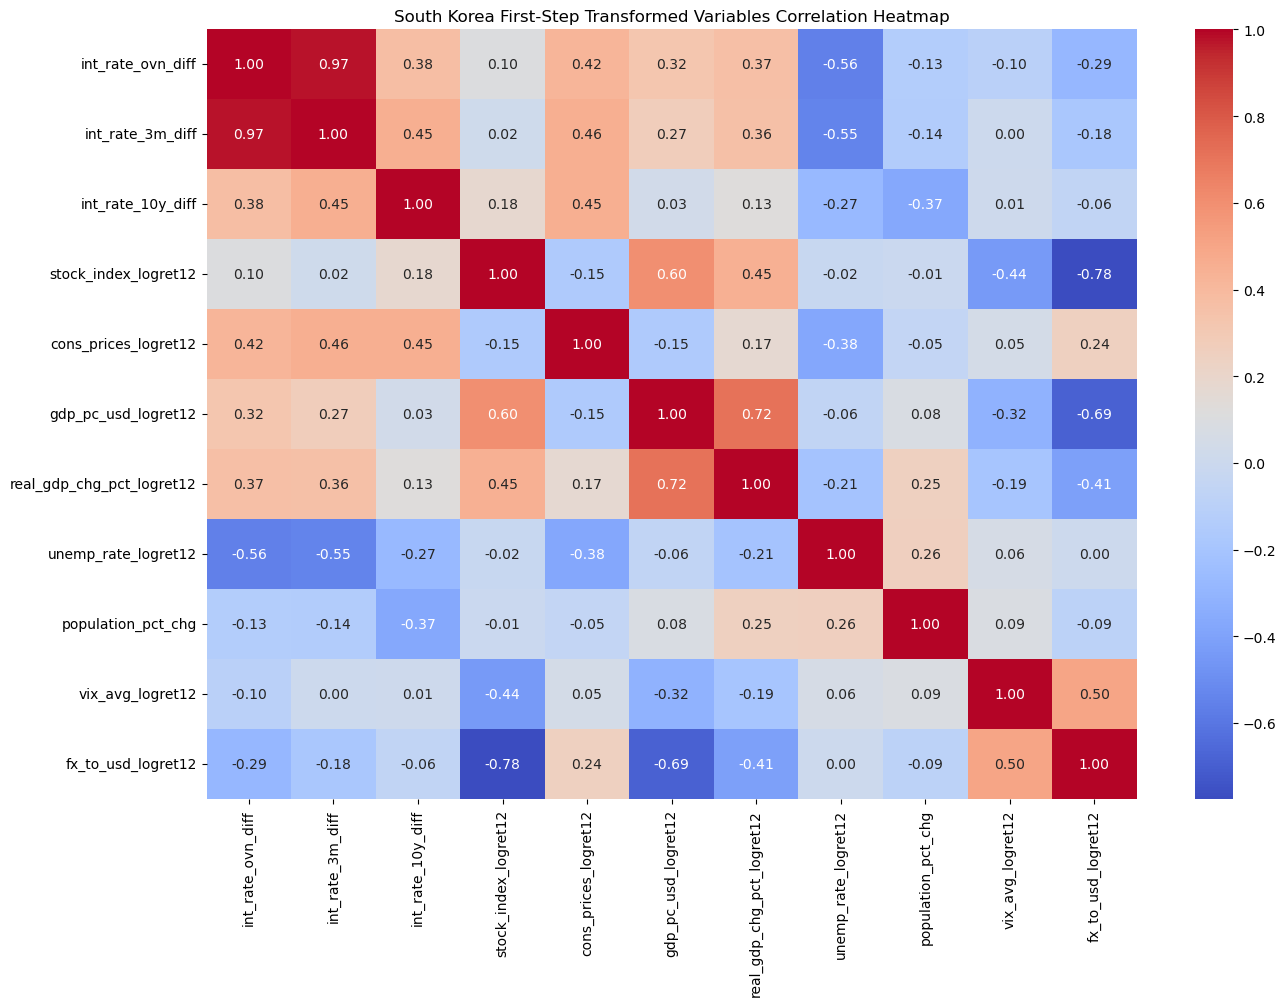

In [542]:
# Generate a correlation matrix heatmap for the first-step transformed variables in the sub_south_korea dataframe

plt.figure(figsize=(15, 10))
sns.heatmap(sub_south_korea.corr(), annot=True, fmt=".2f", cmap="coolwarm")
plt.title("South Korea First-Step Transformed Variables Correlation Heatmap")
plt.show()

##### This correlation heatmap examines variables before necessary stationarization and z-score standardization (normalization, rescaling), which will come later.  Accordingly, there will likely be some spurious correlations within the matrix at this EDA stage.  The correlations measured are between mostly log return (12 months) first-step transformed variables, and to a lesser extent with a few first difference of % variables.

#### Preliminary Interpretation

##### This will merely highlight divergences with the US correlation heatmap results or interesting relationships.

##### Interest rate variables had moderate positive correlations (+0.42-0.45)) with inflation.  The overnight and 3-month interest rates had moderate-strong negative correlations (-0.55 to -0.56) with the unemployment rate.

##### The primary stock market index log returns had moderate-strong positive correlations (+0.45-0.60) with both GDP measures, and like Japan, a moderate negative correlation (-0.44) with the VIX.  Meanwhile, it had a strong negative correlation (-0.78) with the 'fx_to_usd' variable, which for South Korea represents (KRW, e.g. South Korean Won amount per 1 USD). The South Korean stock market apparently likes a strong South Korean Won, which on the surface is surprising because exports comprise a high % of GDP (like Japan), and the correlation direction is the exact opposite of its equivalent measure in its neighbor Japan.  However, for South Korea imports comprise a slightly higher % of GDP than exports, which might explain the dynamic.

##### Both measures of GDP registered moderate-strong negative correlations (-0.41 to -0.69) with 'fx_to_usd' (KRW to 1 USD), thus a strong local currency versus USD helps grow GDP or maybe vice-versa. Chicken-versus-egg question, e.g. which came first.

##### The VIX variable, even though a US stock market "fear gauge", had a moderate positive correlation (+0.50) with 'fx_to_usd', suggesting that any fearful sentiment in the US equities market weakens the KRW relative to USD.  If not a spurious correlation, then that's possibly a "safe haven" dynamic impacting cross-border capital flows.

### 04.02 Scatterplots

### Comment: All scatterplots here are of first-step transformed variables as log returns (annual) or first difference %'s. For brevity the short form of the variable name is used in plot labels and descriptive commentary.

### Note: Both versions of the GDP measure change data values annually rather than monthly, while all other variables (except population) change data values monthly, thus the scatterplots that include either GDP measure will have straight lines of dots representing this difference in measurement periodicity.

#### South Korea

In [762]:
# Check variables for candidate scatterplots based on the prior correlation heatmap results
sub_south_korea.columns

Index(['int_rate_ovn_diff', 'int_rate_3m_diff', 'int_rate_10y_diff',
       'stock_index_logret12', 'cons_prices_logret12', 'gdp_pc_usd_logret12',
       'real_gdp_chg_pct_logret12', 'unemp_rate_logret12',
       'population_pct_chg', 'vix_avg_logret12', 'fx_to_usd_logret12'],
      dtype='object')

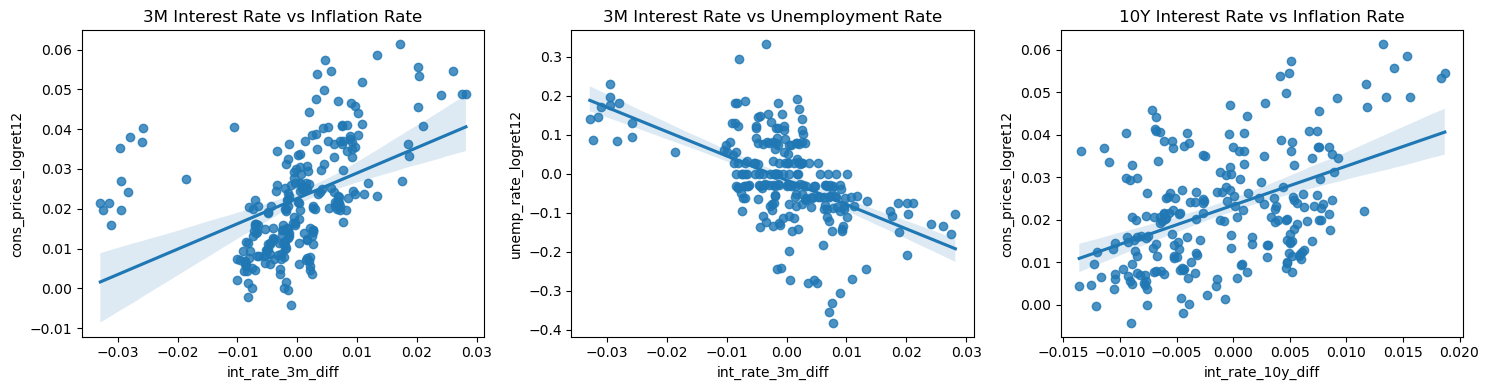

In [764]:
# Scatterplots for interest rate variables against other measures
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.regplot(x='int_rate_3m_diff', y='cons_prices_logret12', data=sub_south_korea, ax=axes[0])
axes[0].set_title('3M Interest Rate vs Inflation Rate')
sns.regplot(x='int_rate_3m_diff', y='unemp_rate_logret12', data=sub_south_korea, ax=axes[1])
axes[1].set_title('3M Interest Rate vs Unemployment Rate')
sns.regplot(x='int_rate_10y_diff', y='cons_prices_logret12', data=sub_south_korea, ax=axes[2])
axes[2].set_title('10Y Interest Rate vs Inflation Rate')
plt.tight_layout()
plt.show()

### Left-hand scatterplot, whose shape resembles a lopsided "U" or "V", may find a better-fitting line with a non-linear function.  The right-hand plot shows a better-fitting line with a linear regression function, suggesting also that the longer-term interest rate (10 years) has a more "stable", or less volatile, relationship with the inflation rate.  The middle plot shows unemployment rate outliers at positive and negative first difference (of % levels) data values for the 3-month interest rate, which might have been caused by some of the exogenous economic shocks targeted in this study.  These scatterplots do not have the time element, which leaves the answer to the question to other plots ahead.

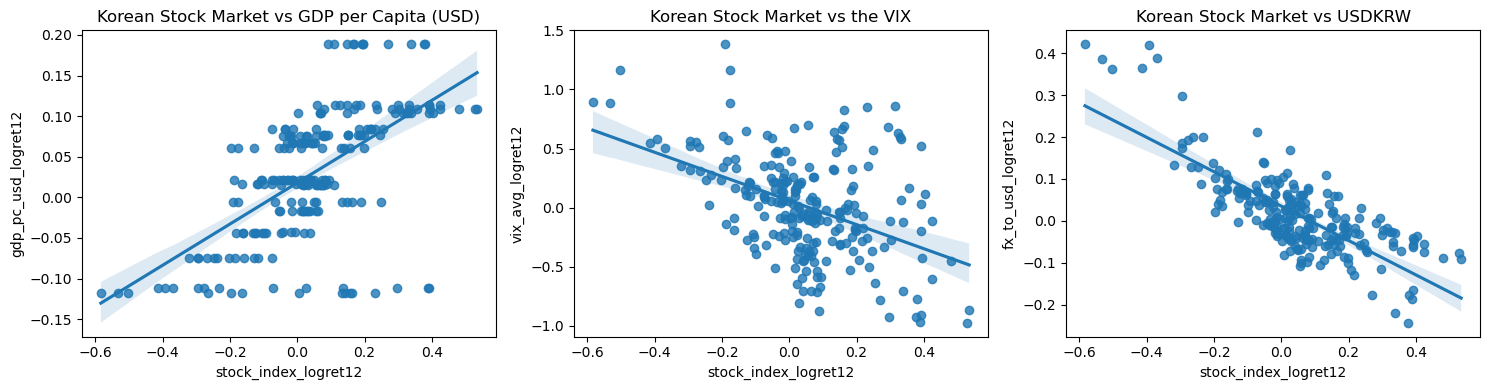

In [767]:
# Scatterplots for stock market index against other measures
fig, axes = plt.subplots(1, 3, figsize=(15, 4))
sns.regplot(x='stock_index_logret12', y='gdp_pc_usd_logret12', data=sub_south_korea, ax=axes[0])
axes[0].set_title('Korean Stock Market vs GDP per Capita (USD)')
sns.regplot(x='stock_index_logret12', y='vix_avg_logret12', data=sub_south_korea, ax=axes[1])
axes[1].set_title('Korean Stock Market vs the VIX')
sns.regplot(x='stock_index_logret12', y='fx_to_usd_logret12', data=sub_south_korea, ax=axes[2])
axes[2].set_title('Korean Stock Market vs USDKRW')
plt.tight_layout()
plt.show()

### Left-side plot did not find a good fit with a linear function, middle plot has some outliers that detract from a linear model-based fit.  The right-hand plot has a good linear fit to the negative correlation between stock index log returns (annual) and USDKRW, e.g. Korean Won amount per 1 USD, which for the South Korea subset dataframe is the 'fx_to_usd' variable.  Stationarization and z-score method standardization of the variables will likely improve on the linear regression line fit to the data values.

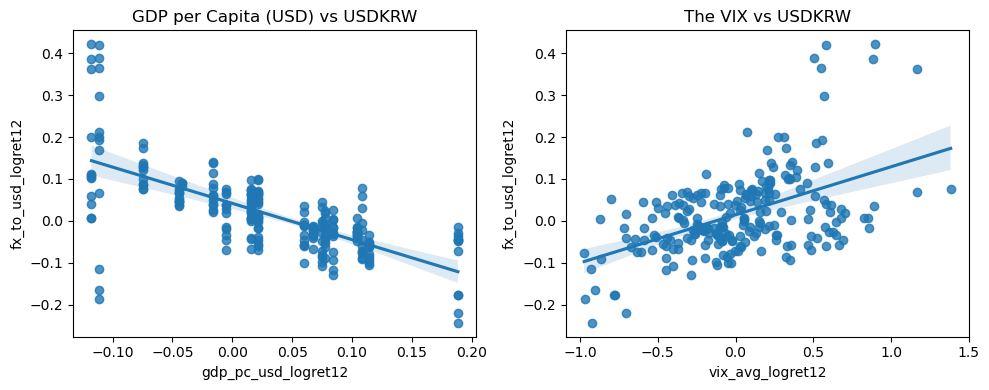

In [773]:
# Two more plots measuring different variables impact on the local currency exchange rate with the USD
fig, axes = plt.subplots(1, 2, figsize=(10, 4))
sns.regplot(x='gdp_pc_usd_logret12', y='fx_to_usd_logret12', data=sub_south_korea, ax=axes[0])
axes[0].set_title('GDP per Capita (USD) vs USDKRW')
sns.regplot(x='vix_avg_logret12', y='fx_to_usd_logret12', data=sub_south_korea, ax=axes[1])
axes[1].set_title('The VIX vs USDKRW')
plt.tight_layout()
plt.show()

### Negative, positive correlations in the left- and right-hand plots, respectively.  Larger variance for the largest negative growth data values for the GDP metric in the left-hand plot, while the right-hand plot shows increased variance as we move away from the center area data values, in either direction.

### 04.03 Pair Plots

#### Comment: Japan pair plots added here because the Japan jupyter notebook (6.2 ESA Task 6.2 Exploring relationships - Japan) accidentally left them out.

#### Japan

In [896]:
# Check variables for candidate pair plots based on prior scatterplots
sub_japan.columns

Index(['int_rate_ovn_diff', 'int_rate_3m_diff', 'int_rate_10y_diff',
       'stock_index_logret12', 'gdp_pc_usd_logret12',
       'real_gdp_chg_pct_logret12', 'unemp_rate_logret12',
       'population_pct_chg', 'vix_avg_logret12', 'aud_jpy_logret12',
       'chf_jpy_logret12', 'eur_jpy_logret12', 'gbp_jpy_logret12',
       'usd_jpy_logret12'],
      dtype='object')

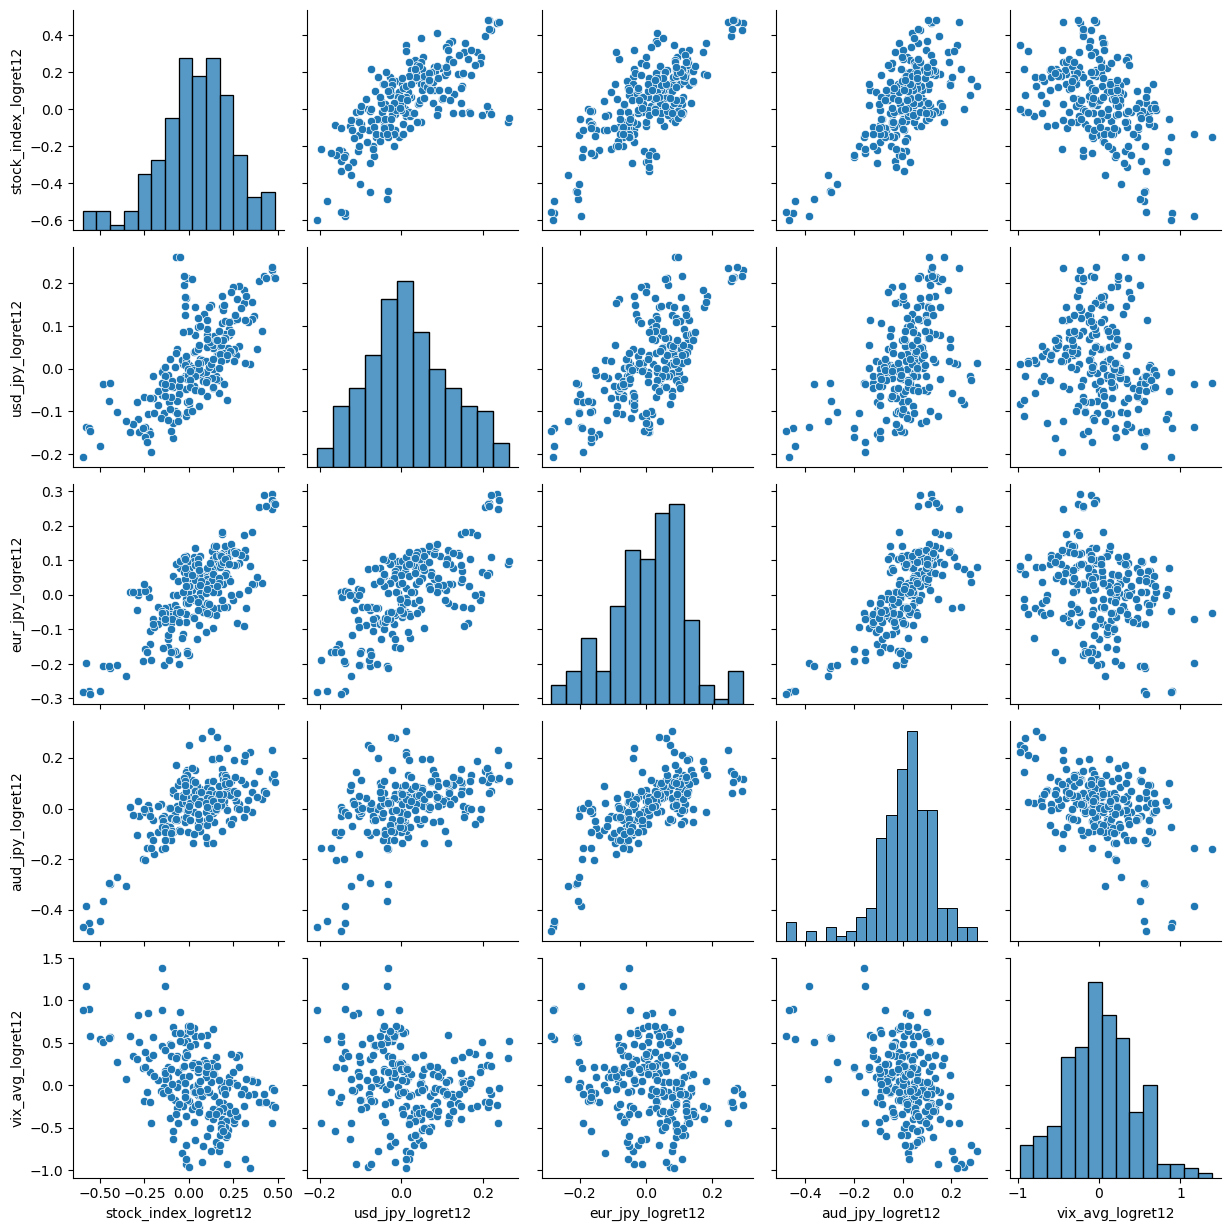

In [898]:
# Create a pair plot matrix
sub_japan_1 = sub_japan[['stock_index_logret12', 'usd_jpy_logret12', 'eur_jpy_logret12', 'aud_jpy_logret12', 'vix_avg_logret12']]
p_japan_1 = sns.pairplot(sub_japan_1)

#### The variables have approximate Normal frequency distributions, with minor left skew in a few cases. Further exploration: (1) AUDJPY vs VIX, to examine two critical "risk on/risk off" sentiment variables, that are global (AUDJPY) vs local (US equities, in the case of the VIX) in scope, with a scatterplot showing their expected inverse (negative) correlation; (2) stock market vs AUDJPY, since Japan is Australia's 2nd largest trading partner and AUDJPY serves as a global risk sentiment indicator, meanwhile the scatterplot shows a positive correlation; (3) stock market vs USDJPY as the US and Japan are significant trading partners, and the scatterplot shows a positive correlation; and (4) stock market vs EURJPY as the EU is a major trading partner of Japan, and the scatterplot shows a positive correlation.

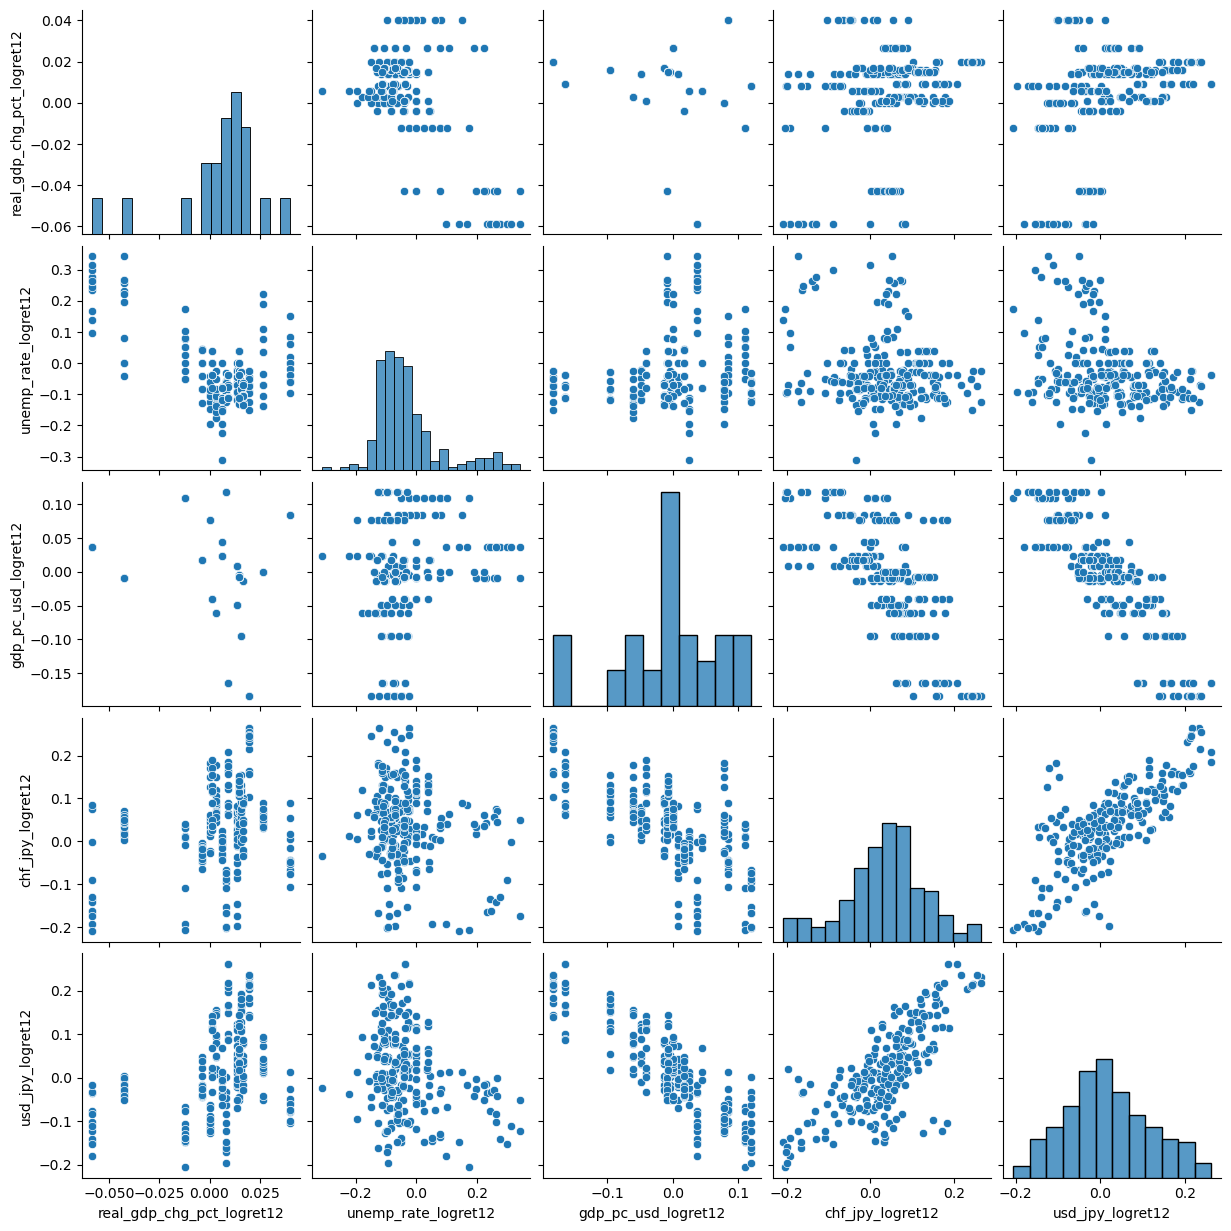

In [901]:
# Create another pair plot matrix
sub_japan_2 = sub_japan[['real_gdp_chg_pct_logret12', 'unemp_rate_logret12', 'gdp_pc_usd_logret12', 'chf_jpy_logret12', 'usd_jpy_logret12']]
p_japan_2 = sns.pairplot(sub_japan_2)

#### The FX cross-currency variables have approximate Normal frequency distributions, but the remaining 3 variables in the pair plot have shapes that deviate from a Normal type. Further exploration: (1) Real GDP vs unemployment rate, as these are major economic variables, and the scatterplot reveals a lopsided "U" or "V" shape which might find a better approximation line fit with a non-linear function; (2) GDP per Capita vs CHFJPY, to see how Japanese GDP growth and contraction impacts the FX cross-rate between the #1 (CHF) and #2 (JPY) world safe-haven currencies, with the scatterplot showing a clear inverse (negative) correlation; and (3) GDP per Capita vs USDJPY, to examine a similar dynamic with the FX cross-rate representing the #2 (JPY) and #3 (US) world safe-haven currencies in this case, with the scatterplot revealing a similarly inverse (negative) correlation.

#### South Korea

In [905]:
# Check variables for candidate pair plots based on prior scatterplots
sub_south_korea.columns

Index(['int_rate_ovn_diff', 'int_rate_3m_diff', 'int_rate_10y_diff',
       'stock_index_logret12', 'cons_prices_logret12', 'gdp_pc_usd_logret12',
       'real_gdp_chg_pct_logret12', 'unemp_rate_logret12',
       'population_pct_chg', 'vix_avg_logret12', 'fx_to_usd_logret12'],
      dtype='object')

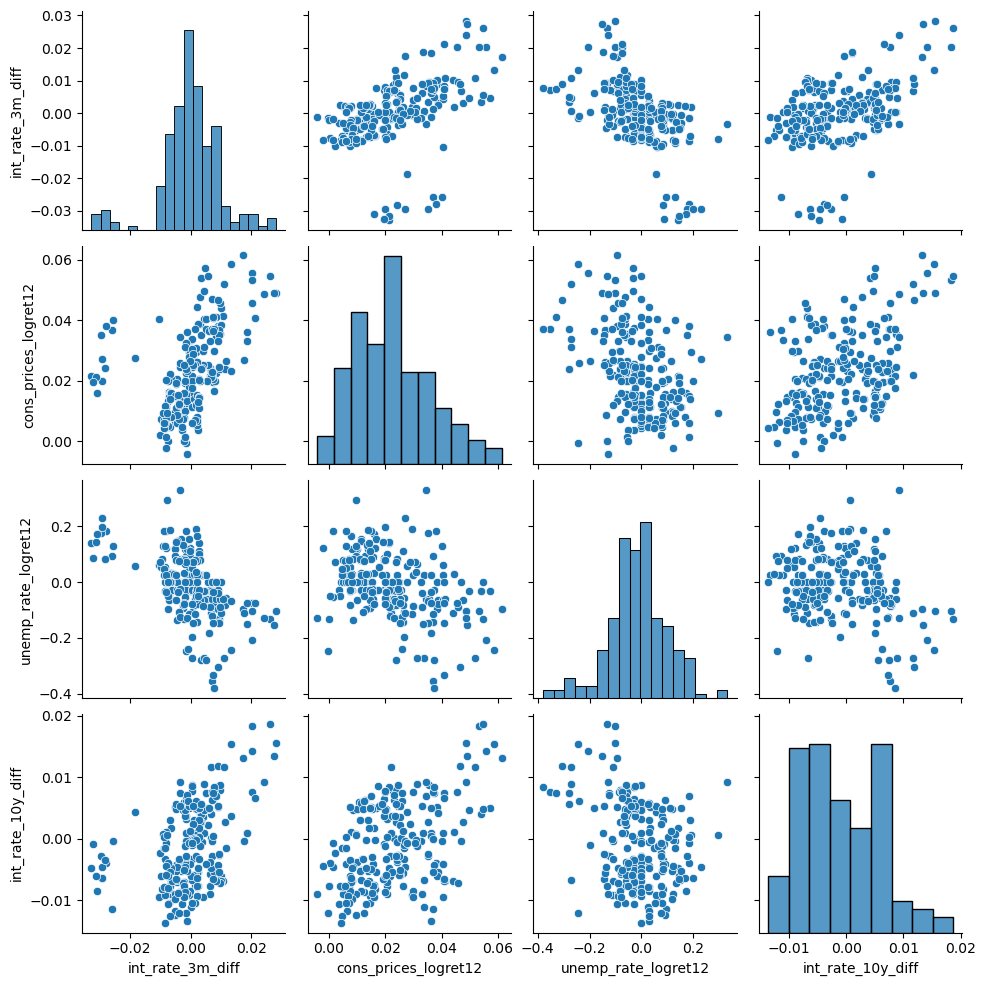

In [907]:
# Create a pair plot matrix
sub_south_korea_1 = sub_south_korea[['int_rate_3m_diff', 'cons_prices_logret12', 'unemp_rate_logret12', 'int_rate_10y_diff']]
p_south_korea_1 = sns.pairplot(sub_south_korea_1)

#### The 'int_rate_10y' variable has a non-Normal frequency distribution, while the remaining three variables approximate a Normal shape with slight variations due to left or right skew. Further exploration: (1) 3-month interest rate vs inflation, to assess the Bank of Korea's effective use of short-term interest rate tools to control inflation, with the scatterplot hinting at a positive correlation despite the presence of significant outliers (which need to be examined against exogenous shock periods); (2) 10-year interest rate vs inflation, to examine a similar dynamic as in point #1 but with long-term interest rate tools, where the scatterplot appears to show a more stable, positive correlation between the variables; and (3) 3-month interest rate vs unemployment rate, to assess whether short-term interest rate increases occur when the unemployment rate is increasing or decreasing, with the scatterplot suggesting the latter dynamic (e.g. negative correlation).

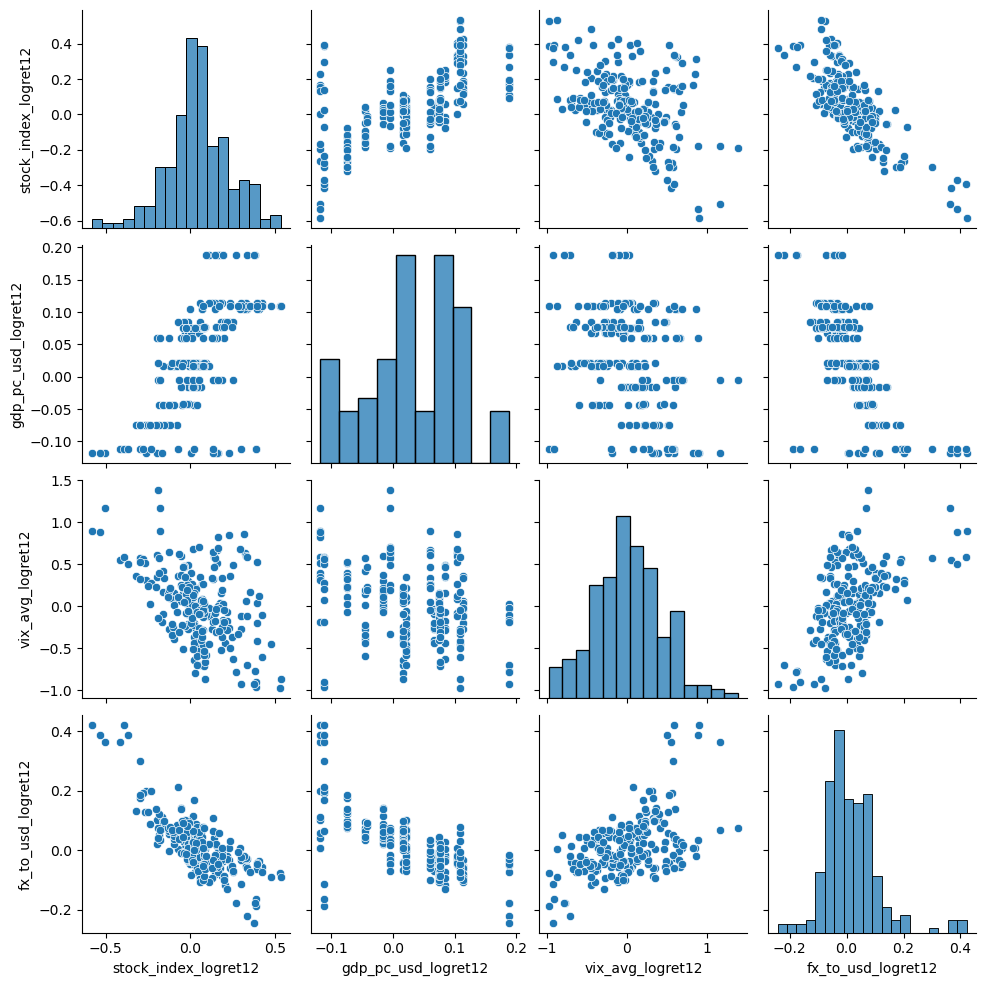

In [911]:
# Create a pair plot matrix
sub_south_korea_2 = sub_south_korea[['stock_index_logret12', 'gdp_pc_usd_logret12', 'vix_avg_logret12', 'fx_to_usd_logret12']]
p_south_korea_2 = sns.pairplot(sub_south_korea_2)

#### The variables, except for 'gdp_pc_usd' (lumpy and misshapen), have approximate Normal frequency distributions, with minor left or right skew. Further exploration: (1) stock market vs GDP per Capita as these are key macroeconomic variables, and the scatterplot shows a positive correlation; (2) stock market vs VIX to see how a US equities market fear gauge (the VIX) impacts a non-US stock market (South Korea, in this case), and because the scatterplot suggests an inverse (negative) correlation as per the US experience; (3) stock market vs USDKRW (South Korean Won amount per 1 USD), as the US is a top trading partner of South Korea, with the scatterplot showing a negative correlation between the variables, and to compare with the Japanese stock market, which actually has the opposite direction correlation with USDJPY; (4) GDP per Capita vs USDKRW, to confirm an expected negative correlation between these key variables to match the Japanese experience (vs USDJPY), which the scatterplot supports; and (5) VIX vs USDKRW to examine the impact if any of a US equities market fear gauge on the FX cross-currency rate with a major trading partner, where such rate affects the terms of trade, and because the scatterplot reveals an unambiguous positive correlation.

### 04.04 Categorical Plots

#### Disclosure: I engaged ChatGPT to create and name two custom-defined functions below -- namely, shockstack_grid and shockstack_kdegrid_v2 -- for some of the plot matrices in this section. This helped expedite further visualization of dozens of variables, conserve space and time, optimize formatting and legends and right-size grids with varying quantities of sub-plots.

#### The subset dataframes created for EDA correlation heatmaps and pair plots omitted the time variable but were all organized exactly the same way chronologically (and the year 2005 row data was omitted as all the first-step transformed variables as annual log returns, etc. had NaN values that year because monthly data began with Jan 2005), and consisted entirely of numerical variables (no categorical variables). Since these next visualizations target the addition of a categorical dimension, it makes sense now to add a column to the subset dataframes of interest that specifies which -- if any -- exogenous economic shock or shocks existed for the data values in each row (where each row corresponds to a month/year point in time). During normal times, when there were no shock(s) occurring, the categorical data value "No Shock" will be applied.  The goal of the categorical plots is to visually zero in on outlier x,y data points in the scatterplots to see which shock(s), if any, caused some or most of the extreme fluctuations.

#### First it's helpful to create an exogenous economic shock-specific subset dataframe, with a derived column 'shock_name' to name the shock(s) if any that existed at each point in time.

#### Begin by examining the fx_vix_comm_sub_copy subset dataframe on dimensions, content and column names, from which we will extract the shock-related columns to create another subset dataframe.

In [987]:
fx_vix_comm_sub_copy.shape

(231, 38)

In [991]:
fx_vix_comm_sub_copy.head(3)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,aud_cad_logret12,aud_jpy_logret12,chf_aud_logret12,chf_cad_logret12,...,wti_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,lng_asia_avg_logret12,metals_idx_avg_logret12,iron_ore_avg_logret12,copper_avg_logret12,aluminum_avg_logret12,gold_oz_usd_logret12,food_idx_avg_logret12
0,2006-01-01,False,False,False,False,False,-0.066691,0.100485,-0.074108,-0.133531,...,0.335465,0.359997,0.414646,0.232039,0.248924,0.173926,0.403719,0.260799,0.259859,-0.008664
1,2006-02-01,False,False,False,False,False,-0.132060,0.064805,-0.038100,-0.167054,...,0.250573,0.285218,0.414646,0.257307,0.248784,0.173926,0.426659,0.264717,0.270769,-0.020714
2,2006-03-01,False,False,False,False,False,-0.133531,0.032516,-0.028171,-0.155755,...,0.146838,0.164536,0.414646,0.202498,0.225671,0.173926,0.416321,0.202034,0.250028,-0.032650


In [993]:
fx_vix_comm_sub_copy.tail(3)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,aud_cad_logret12,aud_jpy_logret12,chf_aud_logret12,chf_cad_logret12,...,wti_avg_logret12,brent_avg_logret12,nat_gas_eu_avg_logret12,lng_asia_avg_logret12,metals_idx_avg_logret12,iron_ore_avg_logret12,copper_avg_logret12,aluminum_avg_logret12,gold_oz_usd_logret12,food_idx_avg_logret12
228,2025-01-01,False,False,False,True,True,0.011173,0.004112,0.011364,0.012739,...,0.021216,-0.011698,0.437476,0.343717,-0.046635,-0.274710,0.072208,0.155268,0.286810,0.000664
229,2025-02-01,False,False,False,True,True,0.022473,-0.020073,0.005698,0.025642,...,-0.076930,-0.084259,0.637948,0.512185,0.009276,-0.151745,0.116488,0.197657,0.358192,-0.017491
230,2025-03-01,False,False,False,True,True,0.011173,-0.045619,0.045462,0.069870,...,-0.174869,-0.169132,0.433658,0.378025,0.043760,-0.061186,0.113314,0.173413,0.323844,-0.050646


In [995]:
fx_vix_comm_sub_copy.columns

Index(['timestamp', 'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag',
       'boj_int_rate_flag', 'aud_cad_logret12', 'aud_jpy_logret12',
       'chf_aud_logret12', 'chf_cad_logret12', 'chf_jpy_logret12',
       'eur_aud_logret12', 'eur_cad_logret12', 'eur_chf_logret12',
       'eur_gbp_logret12', 'eur_jpy_logret12', 'eur_usd_logret12',
       'gbp_aud_logret12', 'gbp_cad_logret12', 'gbp_jpy_logret12',
       'gbp_usd_logret12', 'usd_aud_logret12', 'usd_cad_logret12',
       'usd_chf_logret12', 'usd_jpy_logret12', 'vix_avg_logret12',
       'all_comm_idx_avg_logret12', 'energy_idx_avg_logret12',
       'wti_avg_logret12', 'brent_avg_logret12', 'nat_gas_eu_avg_logret12',
       'lng_asia_avg_logret12', 'metals_idx_avg_logret12',
       'iron_ore_avg_logret12', 'copper_avg_logret12', 'aluminum_avg_logret12',
       'gold_oz_usd_logret12', 'food_idx_avg_logret12'],
      dtype='object')

#### Create an exogenous economic shocks-specific subset dataframe, and then verify dimensions and content

In [1013]:
exo_shk_flags = fx_vix_comm_sub_copy[['timestamp', 'gfc_flag', 'cpc_flag', 'cov_19_flag', 'rus_ukr_war_flag', 'boj_int_rate_flag']]

In [1015]:
exo_shk_flags.shape

(231, 6)

In [1017]:
exo_shk_flags.head(3)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag
0,2006-01-01,False,False,False,False,False
1,2006-02-01,False,False,False,False,False
2,2006-03-01,False,False,False,False,False


In [1019]:
exo_shk_flags.tail(3)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag
228,2025-01-01,False,False,False,True,True
229,2025-02-01,False,False,False,True,True
230,2025-03-01,False,False,False,True,True


#### Create and add a derived column 'shock_name' and applicable shock name categorical data values to the subset dataframe

In [1021]:
exo_shk_flags_copy = exo_shk_flags.copy()

In [1025]:
exo_shk_flags_copy.loc[exo_shk_flags_copy['gfc_flag'] == True, 'shock_name'] = 'GFC'

In [1031]:
exo_shk_flags_copy.loc[exo_shk_flags_copy['cpc_flag'] == True, 'shock_name'] = 'CPC'

In [1033]:
exo_shk_flags_copy.loc[(exo_shk_flags_copy['cov_19_flag'] == True) & (exo_shk_flags_copy['rus_ukr_war_flag'] == False), 'shock_name'] = 'Cov-19'

In [1035]:
exo_shk_flags_copy.loc[(exo_shk_flags_copy['cov_19_flag'] == True) & \
                       (exo_shk_flags_copy['rus_ukr_war_flag'] == True), 'shock_name'] = 'Cov-19 & Rus_Ukr_War'

In [1037]:
exo_shk_flags_copy.loc[(exo_shk_flags_copy['cov_19_flag'] == False) & (exo_shk_flags_copy['rus_ukr_war_flag'] == True) & \
                  (exo_shk_flags_copy['boj_int_rate_flag'] == False), 'shock_name'] = 'Rus_Ukr_War'

In [1039]:
exo_shk_flags_copy.loc[(exo_shk_flags_copy['cov_19_flag'] == False) & (exo_shk_flags_copy['rus_ukr_war_flag'] == True) & \
                  (exo_shk_flags_copy['boj_int_rate_flag'] == True), 'shock_name'] = 'Rus_Ukr_War & BOJ Pivot'

In [1045]:
exo_shk_flags_copy.loc[(exo_shk_flags_copy['gfc_flag'] == False) & (exo_shk_flags_copy['cpc_flag'] == False) & \
                       (exo_shk_flags_copy['cov_19_flag'] == False) & (exo_shk_flags_copy['rus_ukr_war_flag'] == False) & \
                       (exo_shk_flags_copy['boj_int_rate_flag'] == False), 'shock_name'] = 'No Shock'

#### Check the modified dataframe dimensions and content to verify that the 'shock_name' column derivation took place as intended

In [1047]:
exo_shk_flags_copy.shape

(231, 7)

In [1049]:
exo_shk_flags_copy['shock_name'].value_counts(dropna = False)

shock_name
No Shock                   132
GFC                         29
Cov-19                      23
Cov-19 & Rus_Ukr_War        16
Rus_Ukr_War & BOJ Pivot     13
CPC                          9
Rus_Ukr_War                  9
Name: count, dtype: int64

### Interesting result. The counts above (which count the number of months, since the data are monthly) tell us: normal economic conditions ("No Shock" periods) comprised only 57% (132/231) of the 19-year plus 3-month temporal range.  Conversely, shocks big (Great Financial Crisis, Covid-19) and small (2014 Commodity Price Collapse, still-ongoing Russia-Ukraine War and the still-ongoing 2024 Bank of Japan Interest Rate Pivot) in total comprised 43% of that temporal range.  We lurch from crisis to crisis, shock to shock.  Hence, this independent study project has the goal of understanding different types of past or current exogenous economic shocks' impact on some countries and asset classes, to help model potential outcomes for these variables based on the new shock that rolled out in April 2025, e.g. US tariff policy changes.

In [1051]:
exo_shk_flags_copy.head(3)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,shock_name
0,2006-01-01,False,False,False,False,False,No Shock
1,2006-02-01,False,False,False,False,False,No Shock
2,2006-03-01,False,False,False,False,False,No Shock


In [1053]:
exo_shk_flags_copy.tail(3)

,timestamp,gfc_flag,cpc_flag,cov_19_flag,rus_ukr_war_flag,boj_int_rate_flag,shock_name
228,2025-01-01,False,False,False,True,True,Rus_Ukr_War & BOJ Pivot
229,2025-02-01,False,False,False,True,True,Rus_Ukr_War & BOJ Pivot
230,2025-03-01,False,False,False,True,True,Rus_Ukr_War & BOJ Pivot


In [1055]:
# Export the exogenous shock-specific subset dataframe as backup, as it may prove useful later
exo_shk_flags_copy.to_pickle(os.path.join(path, 'Data','Prepared Data', 'exo_shk_flags_copy.pkl'))

#### Define a custom function to create a grid of histograms for selected variables, with a categorical variable overlay.

In [59]:
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import numpy as np
import math

def shockstack_grid(df, vars_to_plot, hue='shock_name', bins=20, cols=3, figsize_per_plot=(6, 5),
                     save=False, filename=None, filetype='png', output_dir='.'):
    """
    Plots a grid of color-stacked histograms for selected variables using the 'hue' column (default: 'shock_name').

    Parameters:
        df (pd.DataFrame): DataFrame containing the data.
        vars_to_plot (list of str): List of up to 9 numeric variable names to include.
        hue (str): Column name to use for stacked colors (e.g., 'shock_name').
        bins (int): Number of bins for histogram.
        cols (int): Number of columns in the subplot grid (2 or 3 recommended).
        figsize_per_plot (tuple): Size per subplot (width, height).
        save (bool): If True, saves to disk.
        filename (str): If "save" chosen, specify the filename for the output.
        filetype (str) : If "save" chosen, optional other formats include 'pdf', otherwise defaults to 'png'.
        output_dir (str): Path where figures are saved.
    """
    num_vars = len(vars_to_plot)
    rows = math.ceil(num_vars / cols)
    fig, axes = plt.subplots(rows, cols, figsize=(figsize_per_plot[0] * cols, figsize_per_plot[1] * rows), constrained_layout=True)
    axes = axes.flatten() if num_vars > 1 else [axes]
    
    # Define color palette
    categories = df[hue].dropna().unique()
    palette = sns.color_palette("tab10", len(categories))
    color_dict = dict(zip(categories, palette))
    
    for i, var in enumerate(vars_to_plot):
        ax = axes[i]
        # Drop NA rows for variable and hue
        sub_df = df[[var, hue]].dropna()

        # Create binned intervals
        bin_counts = pd.cut(sub_df[var], bins=bins)
        
        # Cross-tabulate
        ctab = pd.crosstab(bin_counts, sub_df[hue])

        # Ensure consistent order
        ctab = ctab[categories]  # match hue order to color_dict

        # Plot stacked bar
        ctab.plot(kind='bar', stacked=True, ax=ax, color=[color_dict[c] for c in categories], edgecolor='black', linewidth=0.3, legend=False)

        ax.set_title(var, fontsize=10)
        ax.set_xlabel("")
        ax.set_ylabel("Count")
        ax.tick_params(axis='x', labelrotation=45)

    # Turn off unused subplots
    for j in range(i + 1, len(axes)):
        axes[j].axis('off')

    # Central legend
    handles = [plt.Rectangle((0, 0), 1, 1, color=color_dict[c]) for c in categories]
    fig.legend(handles, categories, title=hue, loc='upper right', bbox_to_anchor=(0.97, 1.05), fontsize=8)
    
    plt.suptitle("Stacked Histograms by Shock Event", fontsize=14)

    if save:
        if filename is None:
            timestamp = pd.Timestamp.now().strftime("%Y%m%d_%H%M%S")
            filename = f"shockstack_grid_{timestamp}.{filetype}"
        else:
            filename = f"{filename}.{filetype}" if not filename.endswith(f".{filetype}") else filename

        full_path = os.path.join(output_dir, filename)
        plt.savefig(full_path, dpi=300, bbox_inches='tight')
        print(f"✅ Saved to: {full_path}")
    
    plt.show()


#### South Korea

#### Add the 'shock_name' categorical variable from the 'exo_shk_flags_copy' dataframe to the earlier-created 'sub_south_korea' subset dataframe filtered for South Korea, in order to overlay this categorical variable on scatterplots and histograms.

In [1315]:
sub_south_korea_1_copy = sub_south_korea.copy()

In [1317]:
sub_south_korea_1_copy['shock_name'] = exo_shk_flags_copy['shock_name']

In [1319]:
sub_south_korea_1_copy.shape

(231, 12)

In [1321]:
sub_south_korea_1_copy.head(3)

,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg,vix_avg_logret12,fx_to_usd_logret12,shock_name
0,0.0048,0.0068,0.0116,0.423264,0.022055,0.113968,0.050693,-0.111226,0.005266,-0.110001,-0.056028,No Shock
1,0.0066,0.0066,0.0040,0.332493,0.019828,0.113968,0.050693,-0.028171,0.005266,0.062883,-0.051202,No Shock
2,0.0072,0.0072,0.0065,0.298500,0.019710,0.113968,0.050693,-0.028171,0.005266,-0.116166,-0.033303,No Shock


In [1323]:
sub_south_korea_1_copy.tail(3)

,int_rate_ovn_diff,int_rate_3m_diff,int_rate_10y_diff,stock_index_logret12,cons_prices_logret12,gdp_pc_usd_logret12,real_gdp_chg_pct_logret12,unemp_rate_logret12,population_pct_chg,vix_avg_logret12,fx_to_usd_logret12,shock_name
228,-0.0042,-0.0070,-0.0053,-0.007678,0.022216,-0.042029,0.00995,0.000000,-0.000978,0.224487,0.090444,Rus_Ukr_War & BOJ Pivot
229,-0.0062,-0.0074,-0.0060,-0.019463,0.020058,-0.042029,0.00995,0.000000,-0.000978,0.193819,0.082512,Rus_Ukr_War & BOJ Pivot
230,-0.0072,-0.0081,-0.0059,-0.042971,0.020354,-0.042029,0.00995,-0.036368,-0.000978,0.459799,0.090493,Rus_Ukr_War & BOJ Pivot


In [1325]:
sub_south_korea_1_copy.columns

Index(['int_rate_ovn_diff', 'int_rate_3m_diff', 'int_rate_10y_diff',
       'stock_index_logret12', 'cons_prices_logret12', 'gdp_pc_usd_logret12',
       'real_gdp_chg_pct_logret12', 'unemp_rate_logret12',
       'population_pct_chg', 'vix_avg_logret12', 'fx_to_usd_logret12',
       'shock_name'],
      dtype='object')

#### Create a South Korea scatterplots grid for those variable correlations identified in the prior section "04.03 Pair Plots" for further exploration, adding a categorical variable ('shock_name') to reveal any exogenous economic shock-related patterns in the data pairs.  Save and export the grid visualization.

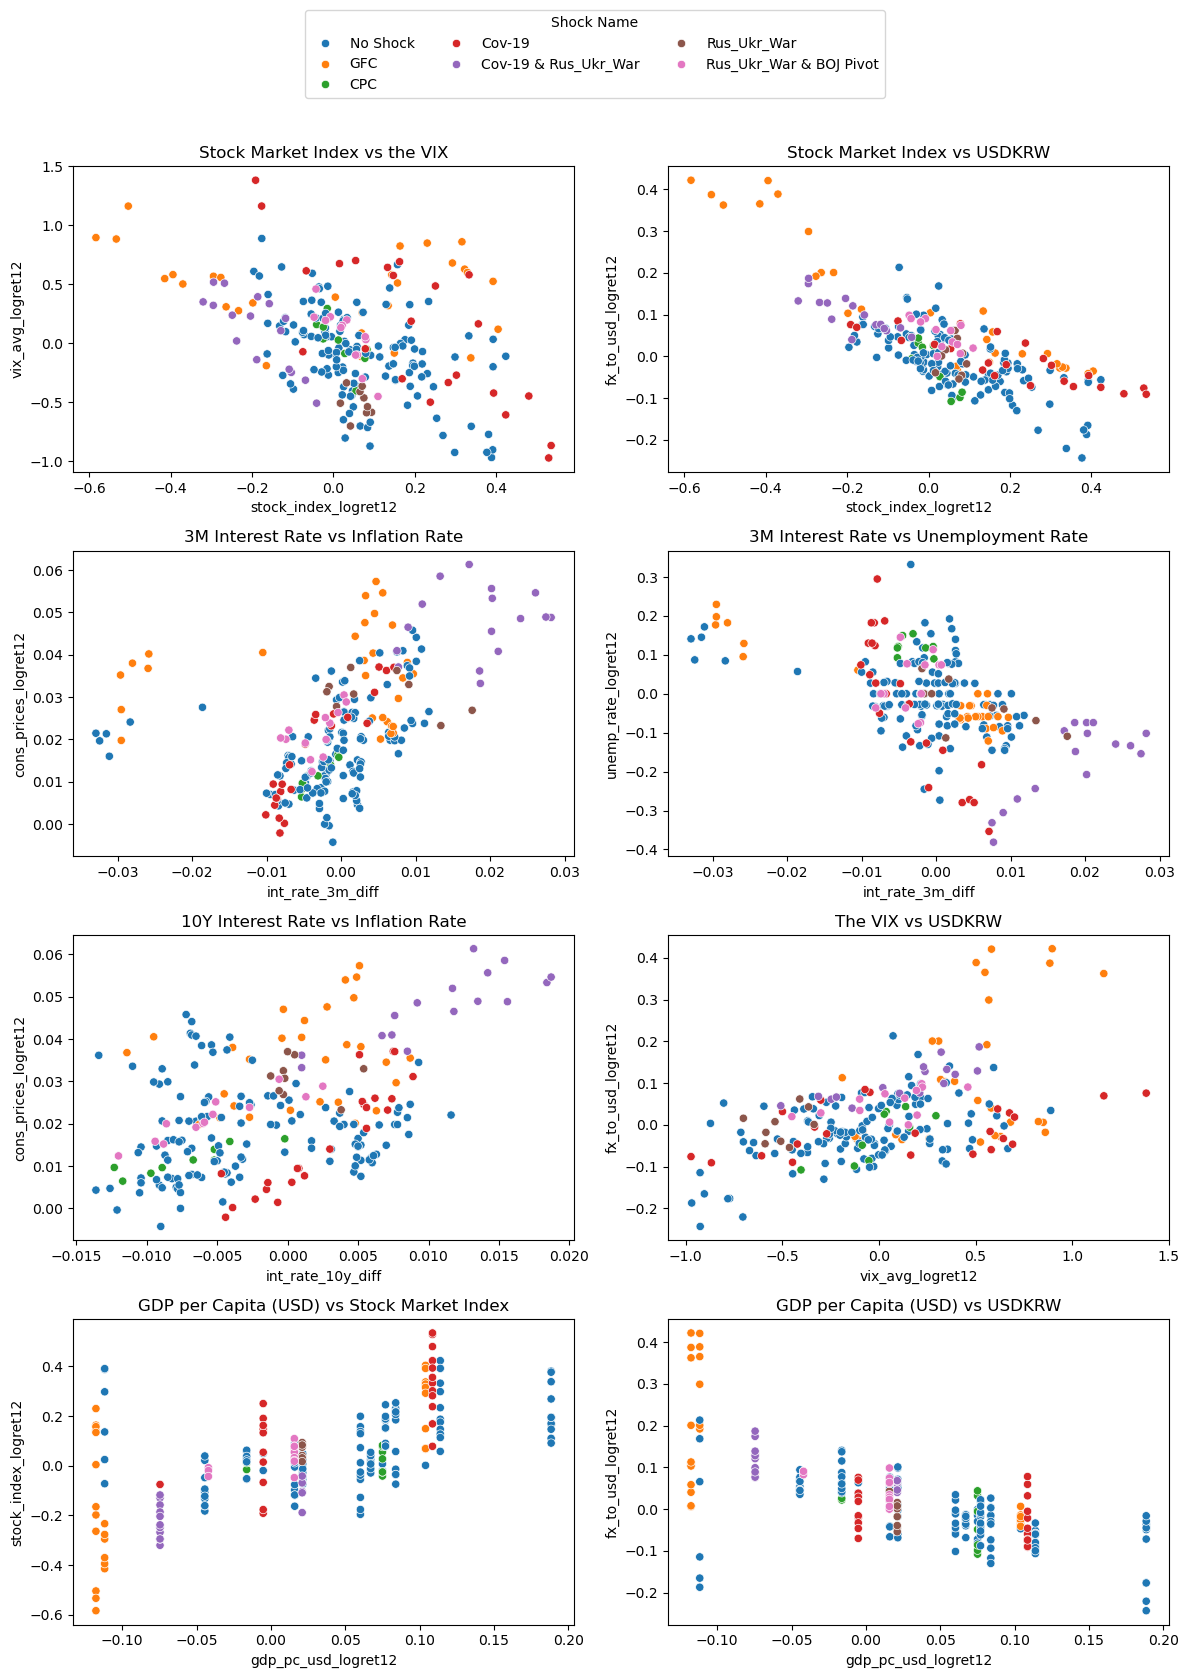

In [1329]:
# Create a 4 x 2 grid of subplots
fig, axes = plt.subplots(4, 2, figsize=(12, 16))
plot_kwargs = dict(data=sub_south_korea_1_copy, hue='shock_name', legend=False)

# Create scatterplots without individual legends
sns.scatterplot(x='stock_index_logret12', y='vix_avg_logret12', ax=axes[0, 0], **plot_kwargs)
axes[0, 0].set_title('Stock Market Index vs the VIX')

sns.scatterplot(x='stock_index_logret12', y='fx_to_usd_logret12', ax=axes[0, 1], **plot_kwargs)
axes[0, 1].set_title('Stock Market Index vs USDKRW')

sns.scatterplot(x='int_rate_3m_diff', y='cons_prices_logret12', ax=axes[1, 0], **plot_kwargs)
axes[1, 0].set_title('3M Interest Rate vs Inflation Rate')

sns.scatterplot(x='int_rate_3m_diff', y='unemp_rate_logret12', ax=axes[1, 1], **plot_kwargs)
axes[1, 1].set_title('3M Interest Rate vs Unemployment Rate')

sns.scatterplot(x='int_rate_10y_diff', y='cons_prices_logret12', ax=axes[2, 0], **plot_kwargs)
axes[2, 0].set_title('10Y Interest Rate vs Inflation Rate')

sns.scatterplot(x='vix_avg_logret12', y='fx_to_usd_logret12', ax=axes[2, 1], **plot_kwargs)
axes[2, 1].set_title('The VIX vs USDKRW')

sns.scatterplot(x='gdp_pc_usd_logret12', y='stock_index_logret12', ax=axes[3, 0], **plot_kwargs)
axes[3, 0].set_title('GDP per Capita (USD) vs Stock Market Index')

sns.scatterplot(x='gdp_pc_usd_logret12', y='fx_to_usd_logret12', ax=axes[3, 1], **plot_kwargs)
axes[3, 1].set_title('GDP per Capita (USD) vs USDKRW')

# Create a dummy plot to extract legend handles and labels
dummy_fig, dummy_ax = plt.subplots()
dummy_plot = sns.scatterplot(x='stock_index_logret12', y='vix_avg_logret12', hue='shock_name', data=sub_south_korea_1_copy, ax=dummy_ax)
handles, labels = dummy_ax.get_legend_handles_labels()
plt.close(dummy_fig)  # Close dummy plot so it doesn't show

# Add single legend to the full grid
fig.legend(handles, labels, title='Shock Name', loc='upper center', bbox_to_anchor=(0.5, 1.05), ncol=3)

plt.tight_layout(rect=[0, 0, 1, 0.97])

# Save figure as a high-resolution image
path = r'C:\Users\dirk8\CareerFoundry Projects\05-2025 Exogenous Shocks Analysis'
fig.savefig(os.path.join(path, 'Analysis', 'Visualizations', 'south_korea_scat_pre_stat.png'), dpi=300, bbox_inches='tight')

plt.show()

#### The South Korean stock market vs USDKRW (South Korean Won amount per 1 USD) had the exact opposite relationship, a negative correlation, as compared with the Japanese stock market vs USDJPY.  The South Korean stock market "likes" a strong local currency (against USD), while in Japan, the opposite is true for the Japanese stock market.  Separately, higher fear in the US equities market (based on the VIX) is associated with USD appreciation against KRW, which suggests a flight to what the FX market perceives as the "safer" currency during times of uncertainty or crisis. It is ironic, however, that the US-spawned GFC led to the USD's greatest appreciation against the KRW.  The 10-year rather than 3-month interest rate has the better linear fit with the inflation rate.  GDP per Capita (USD) had similar correlations with other variables as those of Japan, Germany and the US.

#### Run the shockstack_grid function on the individual variables used in the scatterplot grid with categorical variable overlay (above), to review the stacked bar histograms grid visualization output, in particular the outlier data values.

✅ Saved to: C:\Users\dirk8\CareerFoundry Projects\05-2025 Exogenous Shocks Analysis\Analysis\Visualizations\south_korea_hist_pre_stat.png


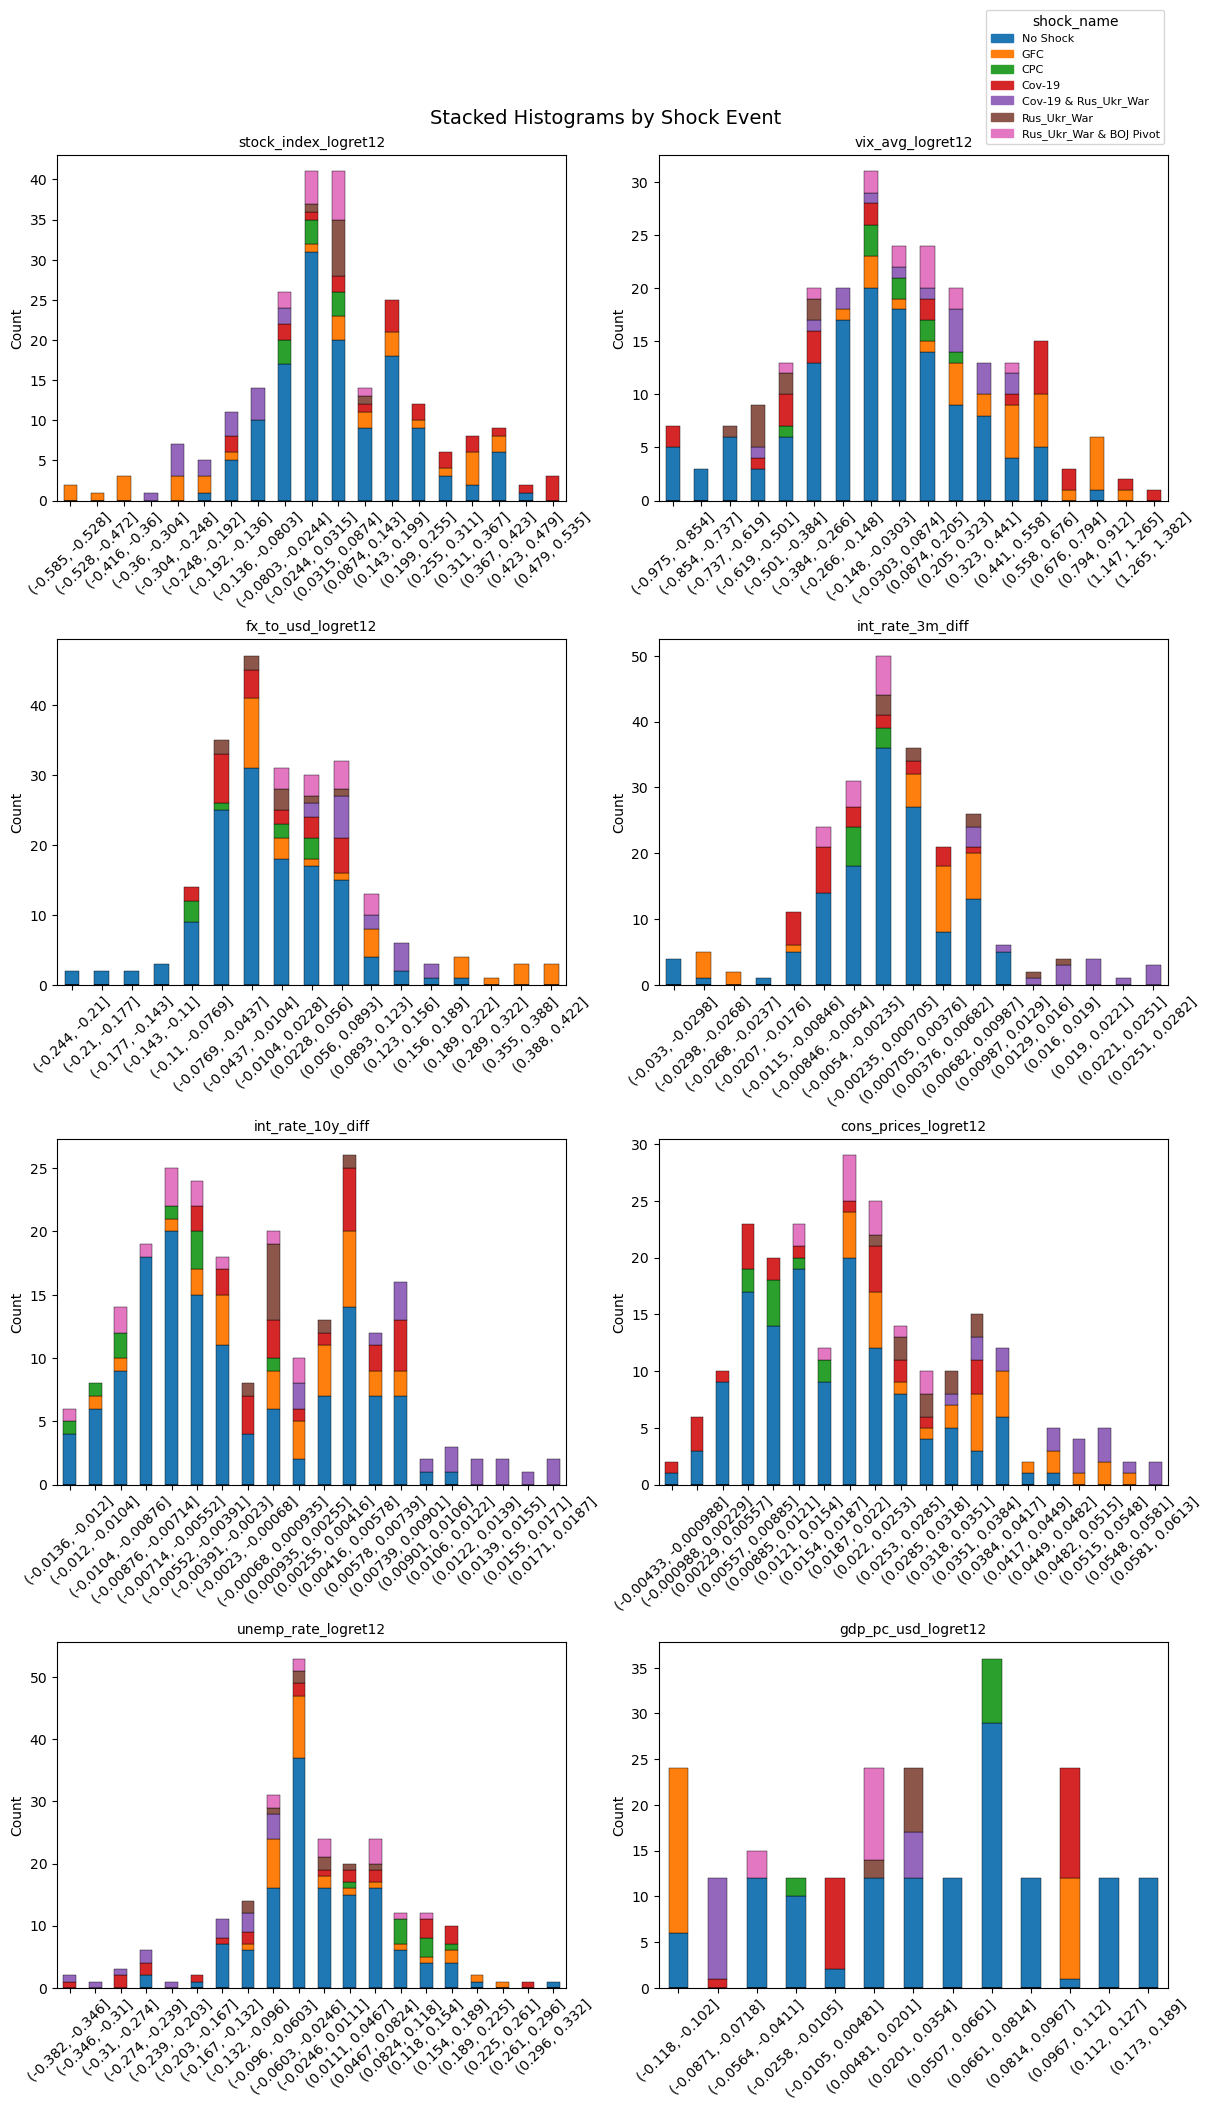

In [1336]:
south_korea_scat_vars = ['stock_index_logret12', 'vix_avg_logret12', 'fx_to_usd_logret12', 'int_rate_3m_diff', 'int_rate_10y_diff',\
                         'cons_prices_logret12','unemp_rate_logret12', 'gdp_pc_usd_logret12']

shockstack_grid(df=sub_south_korea_1_copy, vars_to_plot=south_korea_scat_vars, hue='shock_name', bins=20, cols=2, save=True, filename='south_korea_hist_pre_stat',\
                output_dir=r'C:\Users\dirk8\CareerFoundry Projects\05-2025 Exogenous Shocks Analysis\Analysis\Visualizations')

#### While there are similarities with the other countries' stacked bar histograms in terms of shock event impact and frequency distribution for different variables, it's interesting to note here for the GDP per Capita (USD) variable, the "gapping" behavior of CPC (2014 Commodity Price Collapse, green color), GFC (Global Financial Crisis, orange color) and Covid-19 (both the red and purple periods, the latter overlapping with the start of the Russia-Ukraine War). This is likely due to the measurement periodicity of the GDP measures, which is annually, whereas other variables' data is measured monthly.  The annual measurement periodicity for GDP measures is also clear in all scatterplots with a GDP measure as one of the correlation variables, namely, the vertical straight lines of multiple data points (where the GDP figure stays the same for 12 months but the other variable varies month-to-month).

In [1339]:
# Export the South Korea subset dataframe that was modified for use in categorical plots
path = r'C:\Users\dirk8\CareerFoundry Projects\05-2025 Exogenous Shocks Analysis'
sub_south_korea_1_copy.to_pickle(os.path.join(path, 'Data','Prepared Data', 'south_korea_cat_pre_stat.pkl'))